In [1]:
import numpy as np 
from scipy import stats
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [25]:
def correlation_df(data):
  data2 = data.drop(['bad'], axis=1)
  corr = data2.corr()
  corr = corr.where(np.triu(np.ones(corr.shape)).astype(np.bool))
  corr = corr.stack().reset_index()
  new_df = corr[corr["level_0"] != corr["level_1"]]
  new_df.columns = ['feature1','feature2','Corr']
  return new_df

### **Veri degiskenlerinin aciklanmasi**

**BAD:** BAD değişkeni veri setinde hedef değişkenidir. **'1'** kişinin borcunu zamanında ve usulüne göre yerine getirmediği durum. **'0'** kredi borcunu zamanında ödemiş. 

**LOAN:** Bankadan talep ettiği kredi miktarı 

**MORTDUE:** İpotek için ödemesi gereken tutar

**VALUE:** Müşterinin geçerli mülk değeri

**REASON:** **DebtCont=** diğer borç yükümlülükleri için alınan borç. **HomeImp=** Kişisel ev ihtiyaçları için alınan borç 

**JOB:** Müşterinin meslek (kategorik veri)

**YOJ:** Mevcut mesleğinde kaç yıldır çalışıyor

**DEROG:** Kredi almasını etkileyen önemli zararlı/uygunsuz rapor sayısı

**DELINQ:** Zamanında ödenmemiş kredi sayısı

**CLAGE:** Aylar içinde en eski kredi limitinin yaşı

**NINQ:** Kredi ile ilgili son yapılan sorgu sayısı

**CLNO:** Kredi limitinin sayısı 

**DEBTINC:** Müşterinin borç-gelir oranı 

In [3]:
data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Veri-Bilimi-Bootcamp/hmelq.csv")
data.head()

,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
0,0,81200,18834.0,108355.0,HomeImp,NaN,28.0,0.0,0.0,139.14,0.0,14.0,34.042
1,0,12600,103960.0,127384.0,DebtCon,NaN,2.0,0.0,0.0,129.02,0.0,25.0,34.479
2,0,18000,46865.0,61266.0,DebtCon,NaN,5.0,0.0,0.0,102.59,2.0,9.0,26.354
3,0,10300,57676.0,71027.0,DebtCon,NaN,19.0,0.0,0.0,157.52,1.0,11.0,33.992
4,0,9400,56508.0,78358.0,DebtCon,NaN,17.0,0.0,0.0,141.93,0.0,11.0,32.327


In [5]:
data.groupby("delinq").count()

,bad,loan,mortdue,value,reason,job,yoj,derog,clage,ninq,clno,debtinc
delinq,,,,,,,,,,,,
0.0,2517,2517,2350,2499,2452,2444,2360,2490,2472,2493,2517,2098
1.0,398,398,376,387,391,387,368,347,397,387,398,257
2.0,142,142,137,134,141,142,137,127,142,138,142,89
3.0,69,69,62,69,65,67,68,59,69,68,69,34
4.0,51,51,49,45,45,51,50,38,51,48,51,25
5.0,21,21,20,19,17,20,21,16,21,18,21,8
6.0,15,15,15,13,15,15,15,15,15,15,15,4
7.0,5,5,4,4,5,5,5,5,5,5,5,4
8.0,3,3,2,1,3,3,3,3,3,3,3,0


### **Veri Satir, Sutun ve Veri tipleri hakkinda bilgiler**

In [ ]:
data.shape

(3576, 13)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3576 entries, 0 to 3575
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   bad      3576 non-null   int64  
 1   loan     3576 non-null   int64  
 2   mortdue  3262 non-null   float64
 3   value    3512 non-null   float64
 4   reason   3429 non-null   object 
 5   job      3409 non-null   object 
 6   yoj      3264 non-null   float64
 7   derog    3149 non-null   float64
 8   delinq   3225 non-null   float64
 9   clage    3397 non-null   float64
 10  ninq     3273 non-null   float64
 11  clno     3443 non-null   float64
 12  debtinc  2809 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 363.3+ KB


Bu kısımda hangi verilerin kategorik hangi verilerin numerik olduğuna dair inceleme gerçekleştirildi. Sonuç olarak 6 tane numerik ve 2 tane kategorik veri bulunmaktadır. 

In [ ]:
name_of_col = list(data.columns)
num_var_list = []
str_var_list = []
drop_col=[]

str_var_list = name_of_col.copy()
for var in name_of_col:
    # check if column belongs to numeric type
    if (data[var].dtypes in (np.int, np.int64, np.uint, np.int32, np.float,
                            np.float64, np.float32, np.double)):
        str_var_list.remove(var)
        num_var_list.append(var)
# drop the omit column from list
for var in drop_col:
    if var in str_var_list:
        str_var_list.remove(var)
    if var in num_var_list:
        num_var_list.remove(var)

print("Numeric Column  :", num_var_list,
      "\nCategoric Column :", str_var_list)

Numeric Column  : ['bad', 'loan', 'mortdue', 'value', 'yoj', 'derog', 'delinq', 'clage', 'ninq', 'clno', 'debtinc'] 
Categoric Column : ['reason', 'job']


In [ ]:
# Kac farkli kategorik veri bulunmaktadir. 

for i in data.select_dtypes(include=["object"]).columns:
  print(i," ",data[i].value_counts().count())

reason   2
job   6


### **Verinin istatistiksel bilgileri**

Veri seti 3576 satır ve 13 tane sutündan oluşmaktadır. Burada toplamda 12 tane bağımsız ve 1 tane (bad) bağımlı değişken bulunmaktadır. 

- Sutünlar incelendiğinde Loan, MortDue ve Value özniteliklerin sıfırdan farklı minimum değere sahip olduğu, diğerlerinin sıfır veya sıfıra yakın ortalama minimum değere sahip olduğu görülmektedir. 

- Standard Sapmalar incelendiğinde ise aynı şekilde Loan, Mortdue ve Value özniteliklerinin standard sapmalarının oldukça yüksek çıktığı görülmektedir. Bu verilerin ortalamadan uzak yayıldığı görülmektedir. Aynı şekilde incelendiğinde bu üç özniteliğin düzgün dağılmadığı görülmektedir.

- Boş satır kısmında ise bad ve loan öznitelikleri hariç tüm özniteliklerde NULL değer görülmektedir. En çok boş değer 767 ile debtinc'te bulunurken, en az boş değer 64 ile value özniteliğine aittir. 


In [ ]:
desc_df = data.describe().T
range = data.max() - data.min()
null_count = data.isnull().sum()
null_percent = (data.isnull().sum() / data.count())*100
variance = data.var()

desc_df["range"] = round(range,3)
desc_df["null_values"] = round(null_count,3)
desc_df["null__rate"] = round(null_percent,3)
desc_df["variance"] =  round(variance,3)
desc_df

,count,mean,std,min,25%,50%,75%,max,range,null_values,null__rate,variance
bad,3576.0,0.199385,0.399594,0.00,0.00,0.000,0.00,1.000,1.000,0,0.000,1.600000e-01
loan,3576.0,18529.697987,11262.834060,1100.00,11000.00,16200.000,23100.00,89900.000,88800.000,0,0.000,1.268514e+08
mortdue,3262.0,74013.907992,44016.833772,2619.00,46700.25,65858.000,91717.00,399550.000,396931.000,314,9.626,1.937482e+09
value,3512.0,101076.922759,54865.275351,8800.00,65753.00,89183.000,118928.25,850000.000,841200.000,64,1.822,3.010198e+09
yoj,3264.0,8.832644,7.568046,0.00,3.00,7.000,13.00,41.000,41.000,312,9.559,5.727500e+01
derog,3149.0,0.261670,0.865178,0.00,0.00,0.000,0.00,10.000,10.000,427,13.560,7.490000e-01
delinq,3225.0,0.432558,1.099230,0.00,0.00,0.000,0.00,15.000,15.000,351,10.884,1.208000e+00
clage,3397.0,179.832529,87.066198,0.49,115.60,173.640,230.71,1168.230,1167.740,179,5.269,7.580523e+03
ninq,3273.0,1.186373,1.728723,0.00,0.00,1.000,2.00,17.000,17.000,303,9.258,2.988000e+00
clno,3443.0,21.507116,10.167490,0.00,15.00,20.000,26.00,71.000,71.000,133,3.863,1.033780e+02


Mgr mesleğine sahip olanların %76,78'i borcunu tam zamanında öderken, %23,21 tam zamanında ödememektedir. 

Office mesleğine sahip olan müşteriler %86,81 gibi yüksek bir oranla borcunu tam zamanında ödemektedir. Sales mesleğine sahip olanlar ise %34,84 gibi en yüksek oranla borcunu geciktirmektedir. Sonuç olarak Office ve ProfEx mesleğinde olanlar borcunu zamanında ödeyip kredi skorları Good oluyor.


In [79]:
bad_class = pd.crosstab(index=data["bad"], columns=data["job"], normalize="columns")
bad_class

job,Mgr,Office,Other,ProfEx,Sales,Self
bad,,,,,,
0,0.767896,0.86819,0.767994,0.833116,0.651515,0.704348
1,0.232104,0.13181,0.232006,0.166884,0.348485,0.295652


 DebtCon işlemleri için kredi alanların %81,44'ü borcunu tam zamanında öderken, %18,55'i tamam zamanında ödememektedir. HomeImp işlemleri için kredi alanların %76,93'ü öderken, %23,06'sı kredi borcunu tam zamanında ödememektedir.

Debt işlemleri için gelenler %64.32 oranında borcunu zamanında ödemiyorken, HomeImp için borç alanlar %35.67 oranında borcunu ödemiyor. DebtCon için alanlar genelde borcunu zamanında ödemiyorlar. 


In [98]:
pd.crosstab([data["bad"], data["reason"]], data["job"], normalize="index")

job               Mgr    Office     Other    ProfEx     Sales      Self
bad reason                                                             
0   DebtCon  0.147216  0.172377  0.414347  0.229657  0.021413  0.014989
    HomeImp  0.088348  0.203585  0.379001  0.257362  0.003841  0.067862
1   DebtCon  0.154378  0.129032  0.460829  0.170507  0.046083  0.039171
    HomeImp  0.144033  0.078189  0.518519  0.193416  0.012346  0.053498

In [13]:
bad_class = pd.crosstab(index=data["bad"], columns=data["derog"], normalize="columns")
bad_class

derog,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
bad,,,,,,,,,,,
0,0.832964,0.611321,0.5,0.285714,0.285714,0.5,0.4,0.0,0.0,0.0,0.0
1,0.167036,0.388679,0.5,0.714286,0.714286,0.5,0.6,1.0,1.0,1.0,1.0


### **1. Correlation Heat Map**

In [32]:
corrr = ['loan', 'mortdue', 'value', 'reason', 'job', 'yoj', 'derog',
       'delinq', 'clage', 'ninq', 'clno', 'debtinc']
data2 = data[corrr]

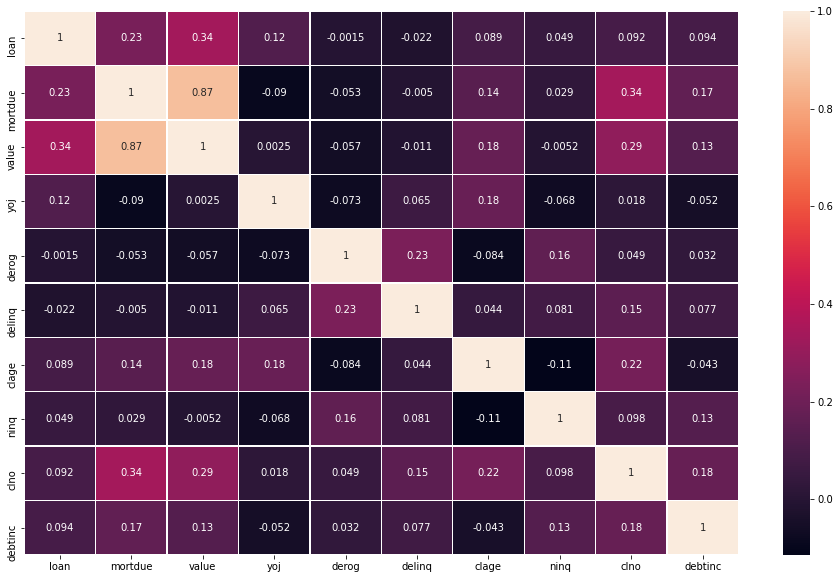

In [33]:
fig, ax = plt.subplots(figsize=(16,10))   
sns.heatmap(data2.corr(), annot=True, linewidths=.3, ax=ax)

Korelasyon ölçeğine baktığımızda -0.15 ve 0.873 arasında dağıldığını görmektedir. Burada **value** ve **mortdue** arasında en yüksek pozitif ilişki olduğu görülmektedir. Dolayısıyla value ve mortdue değişkenleri arasında güçlü bir ilişki olup, biri artarken diğeride artış göstermektedir. 


**clage** ve **bad** arasında -0.15 değeriyle en yüksek negatif ilişki olduğu görülmektedir. Ancak -0.15 değeri negatif yönde düşük bir ilişki olduğunu göstermektedir. 

In [31]:
print(correlation_df(data).sort_values(by="Corr", ascending=False).head(7),"\n")
print(correlation_df(data).sort_values(by="Corr", ascending=True).head(7),"\n")

   feature1 feature2      Corr
11  mortdue    value  0.873280
17  mortdue     clno  0.340139
2      loan    value  0.337453
25    value     clno  0.290439
35    derog   delinq  0.234706
1      loan  mortdue  0.229546
47    clage     clno  0.221071 

   feature1 feature2      Corr
46    clage     ninq -0.113367
12  mortdue      yoj -0.089949
36    derog    clage -0.083755
28      yoj    derog -0.073500
31      yoj     ninq -0.067735
21    value    derog -0.057279
13  mortdue    derog -0.053310 



1. Value ve mortdue incelendiğinnde 0.87 korelasyona sahip oldukları görülmektedir. Biri artarken diğerininde arttığı görülmektedir. Mal varlığı yüksek olan birisi ipoteğide fazla verip kredi skorunu etkileyebilir.

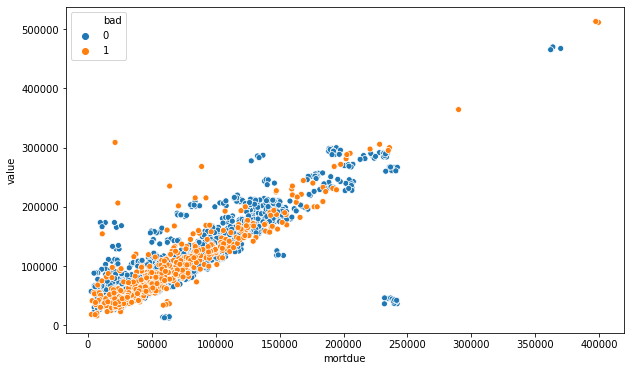

In [70]:
fig, ax = plt.subplots(figsize=(10,6))        
sns.scatterplot(x="mortdue", y="value", hue="bad", data=data, ax=ax)

2. Kişinin talep ettiği kredi miktarı ve mülkiyeti arasında düşük ve pozitif yönde bir ilişki vardır. Müşterinin mülkiyeti talep ettiği krediyi karşılayacak durumda olması borcunu zamanında ödemesi ve kredi skorunu etkileyebilir. 

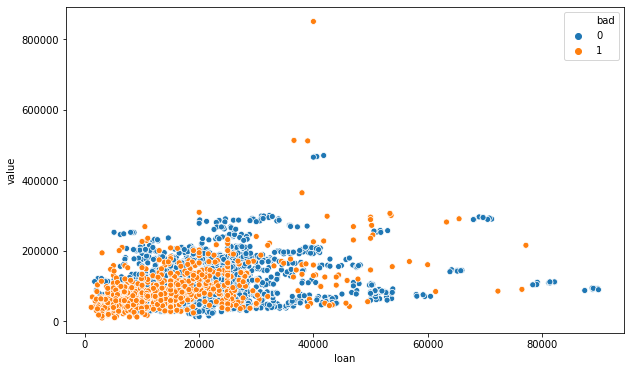

In [69]:
fig, ax = plt.subplots(figsize=(10,6))        
sns.scatterplot(x="loan", y="value", hue="bad", data=data, ax=ax)

3. Kişinin talep ettiği kredi miktarı ve borç/gelir oranı arasında düşük ama pozitif yönde ilişki vardır. Borç/Gelir oranı yüksek olursa müşteri krediyi ödeyebileceği anlamına gelip, daha fazla kredi sağlanabilir ve buda kredi skorunu etkileyebilir.

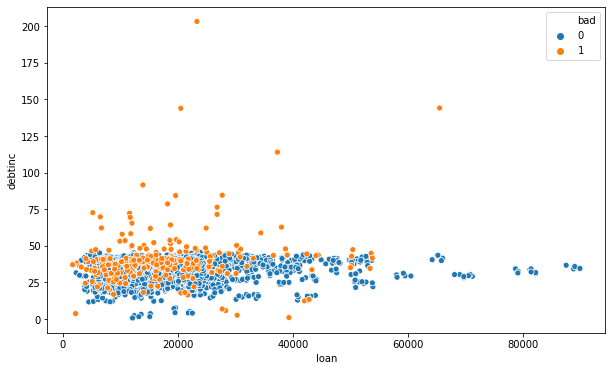

In [68]:
fig, ax = plt.subplots(figsize=(10,6))        
sns.scatterplot(x="loan", y="debtinc", hue="bad", data=data, ax=ax)

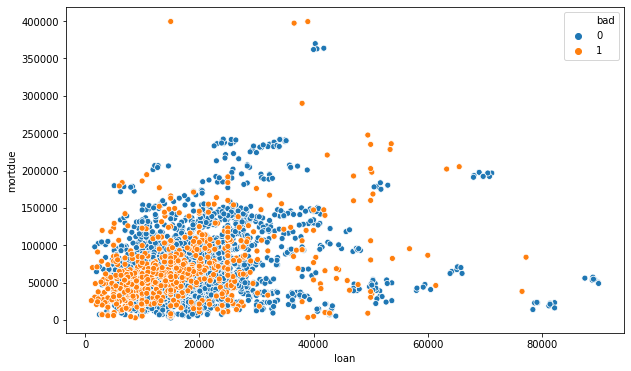

In [67]:
fig, ax = plt.subplots(figsize=(10,6))        
sns.scatterplot(x="loan", y="mortdue", hue="bad", data=data, ax=ax)

## **2. Box Plot**

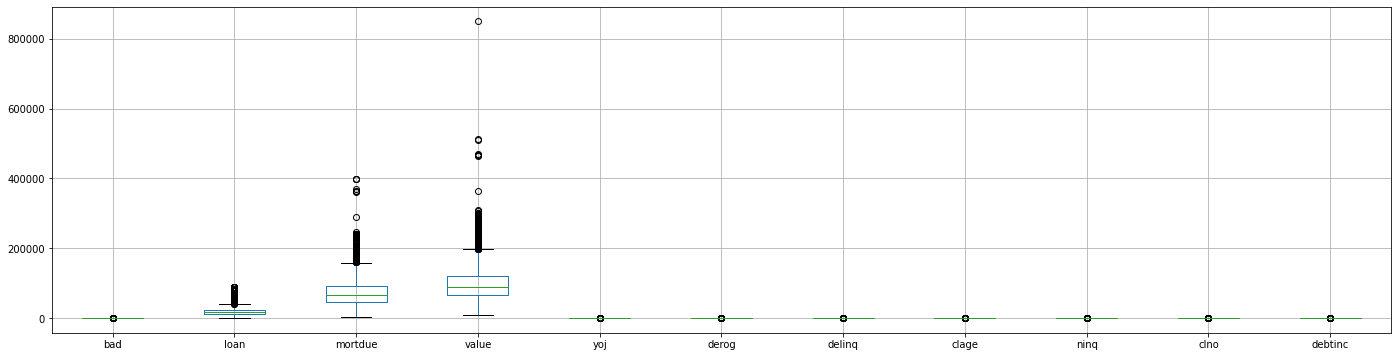

In [ ]:
plt.figure(figsize=(24,6))
data.boxplot()
plt.show()

Boxplot grafikleri incelendiğinde Loan, Mortdue ve value özniteliklerinin five summary değerlerini en iyi özetlediği görülmektedir. 
Bu üç öznitelikten büyük median, minimum ve maximum değerlere sahip value özniteliği olduğu görülmektedir. Value özniteliğinden sonra büyükten küçüğe doğru mortdue ve loan özniteliklerinin geldiği görülmektedir. 
- Ancak bu üç değişkende yüksek sayıda aykırı (outlier) değerlerin olduğu görülmektedir. 

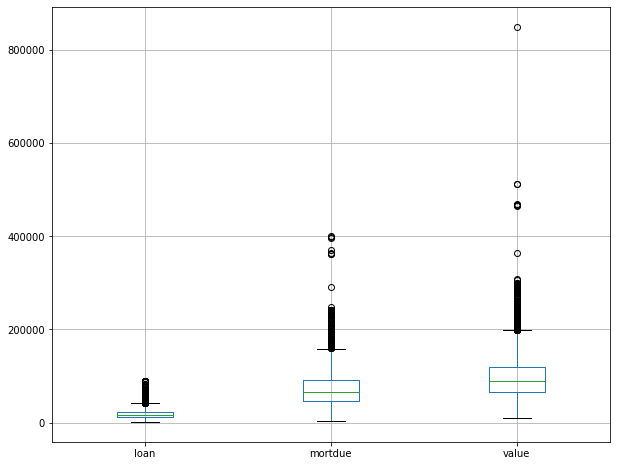

In [ ]:
plt.figure(figsize=(10,8))
boxplot_df = data[["loan", "mortdue","value"]]
boxplot_df.boxplot()
plt.show()

## **3. Histogram Chart**

9 tane öznitelik dağılımları incelendiğinde,bu verilerin ortak özelliği sola doğru çarpık (left skewed) dağılım göstermeleridir. Dno, loan, mortdue, clage, yoj değişkenelerinin daha normal dağılım gösterdiğini söyleyebiliriz. 

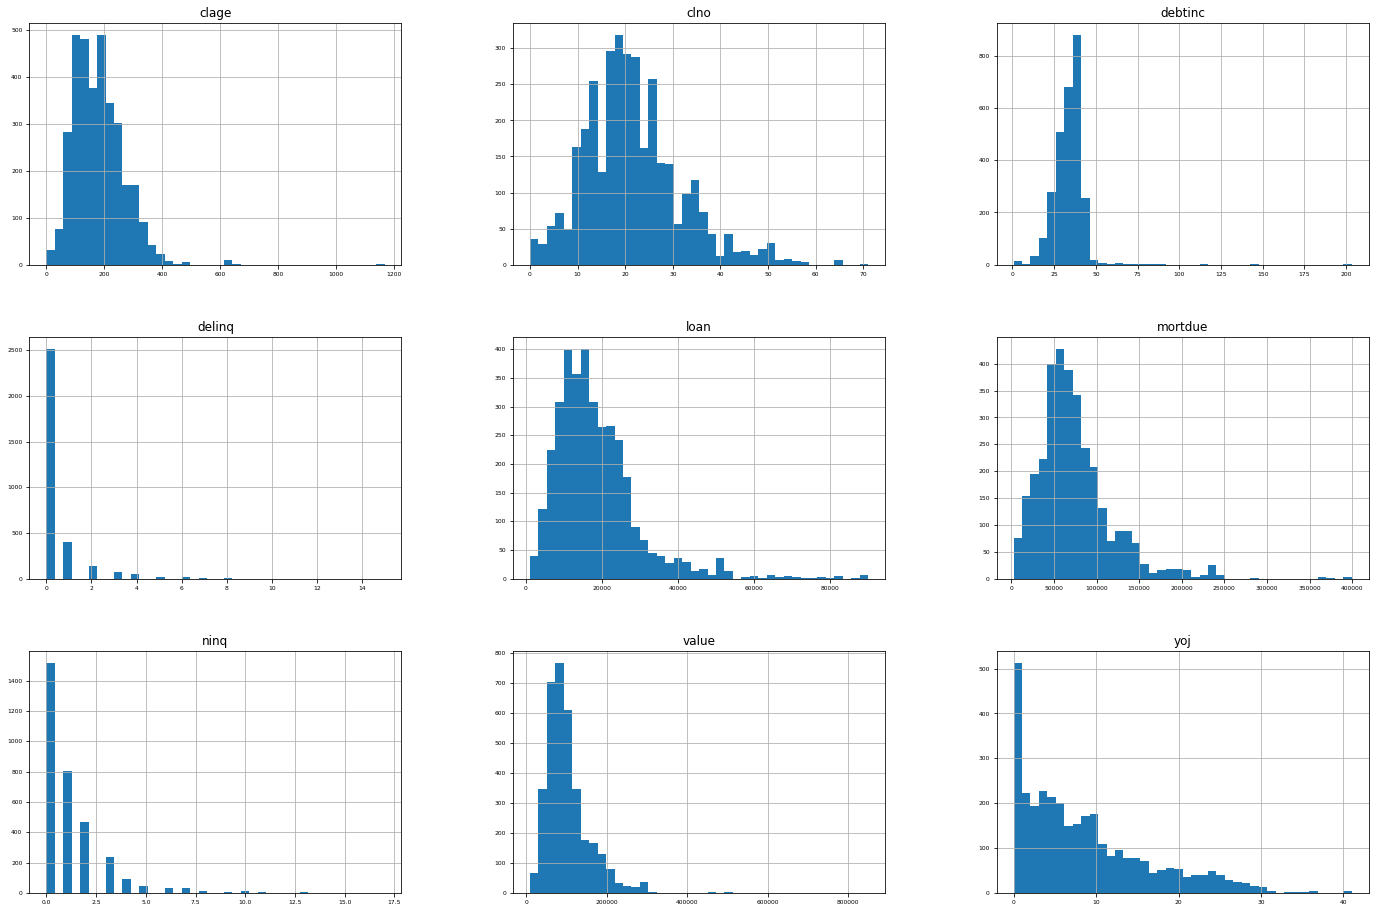

In [139]:
data2 = data.drop(["bad", "derog"], axis=1)
data2.hist(figsize=(24,16), bins=40, xlabelsize=6, ylabelsize=6)
plt.show()

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


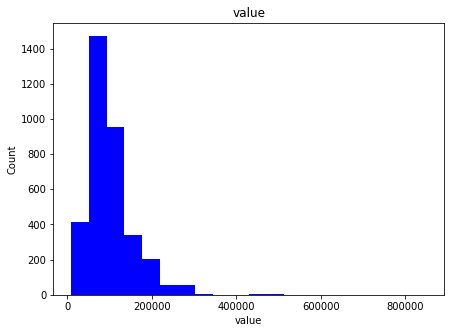

In [ ]:
plt.figure(figsize = (7, 5)) 
x = data["delinq"] 
plt.hist(x, bins=20, color="blue")
plt.title("value") 
plt.xlabel("value") 
plt.ylabel("Count") 
plt.show()

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


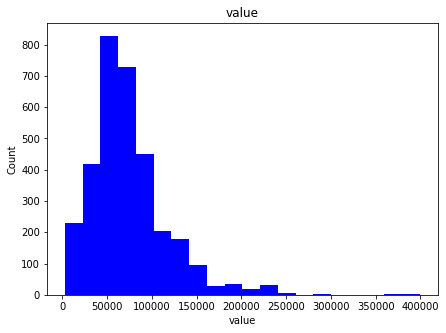

In [ ]:
plt.figure(figsize = (7, 5)) 
x = data["mortdue"] 
plt.hist(x, bins=20, color="blue")
plt.title("value") 
plt.xlabel("value") 
plt.ylabel("Count") 
plt.show()

## **4. Bar Plot (Target Variable)**

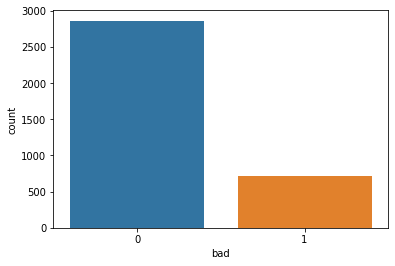

In [ ]:
sns.countplot(x="bad", data=data)

Mesleklere göre borç ödeme hedef değişken sayısı incelendiğinde en yüksek bad=0 değerine Other meslek grubu sahipken, yine aynı şekilde en yükseK bad=1 değerinede sahiptir.



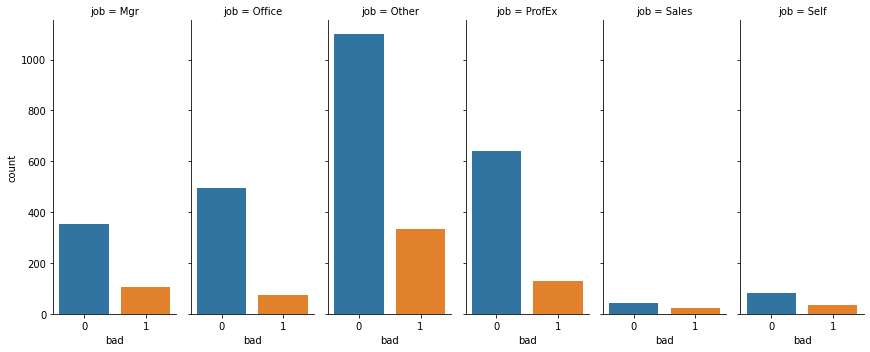

In [ ]:
g = sns.catplot(x="bad", col="job", data=data, kind="count", aspect=.4)

Borç alma nedenine göre veriler incelendiğinde, diğer yükümlülükler için borç alan müşterilerin borcunu zamanında ödediği görülmektedir. Aynı şekilde DebtCon nedenine sahip müşterilerin borcunu en fazla geciktirdiğide görülmektedir.

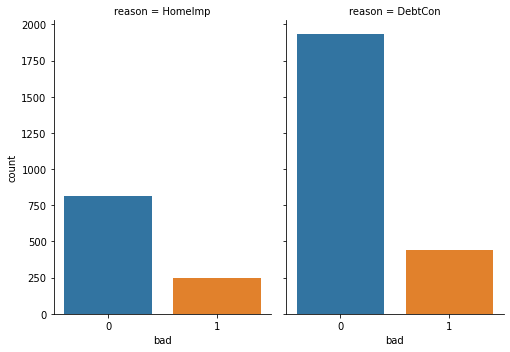

In [ ]:
g = sns.catplot(x="bad", col="reason", data=data, kind="count", aspect=.7)

Bu grafikte ise meslek grupları ve nedenlerine göre borcu ödeme oranları incelenmektedir. 

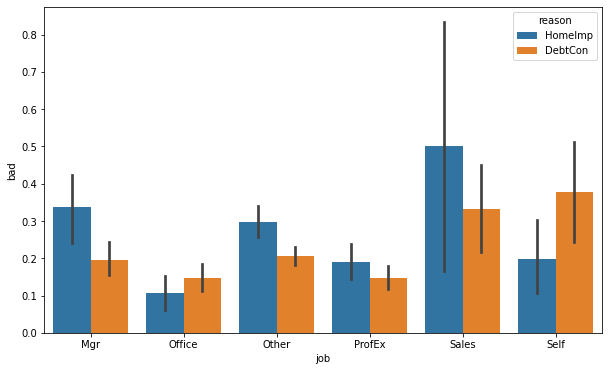

In [86]:
fig, ax = plt.subplots(figsize=(10,6))        
sns.barplot(x="job", y="bad", hue="reason", data=data, ax=ax)

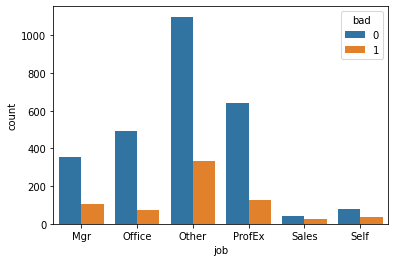

In [84]:
ax = sns.countplot(x="job", hue="bad", data=data)

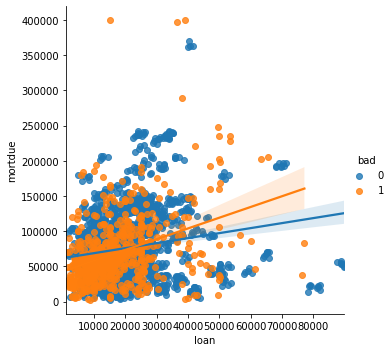

In [65]:
g = sns.lmplot(x="loan", y="mortdue", hue="bad", data=data)

## 5. **Pie Chart**

Pasta grafiği ile mesleklerin yüzdelik oranları görselleştirilmiştir. 

- Other meslek grubu %41.98 gibi bir oranla en yüksek yüzdeliğe sahiptir.

- Sales meslek grubu %1.94 gibi bir oranla en düşük yüzdeliğe sahiptir.

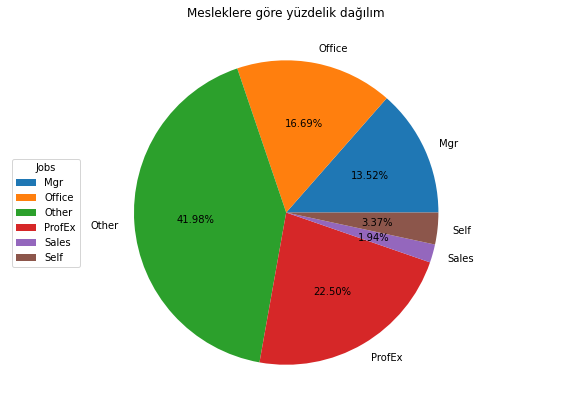

In [ ]:
sums = data.bad.groupby(data.job).count()
fig= plt.figure(figsize=(10,7))
plt.axis('equal');
plt.title("Mesleklere göre yüzdelik dağılım")
plt.pie(sums, labels=sums.index, autopct="%1.2f%%");
plt.legend(title="Jobs", loc="center left")
plt.show()

Pasta grafiği ile kredi alma yüzdelik oranları görselleştirilmiştir. 

- DebtCon denilen diğer borç yükümlülüklerini kapatmak için %69.15 oranla kredi alınmaktadır.
- HomeImp denilen ev ihtiyaçları için %41.98 oranla kredi alınmaktadır.

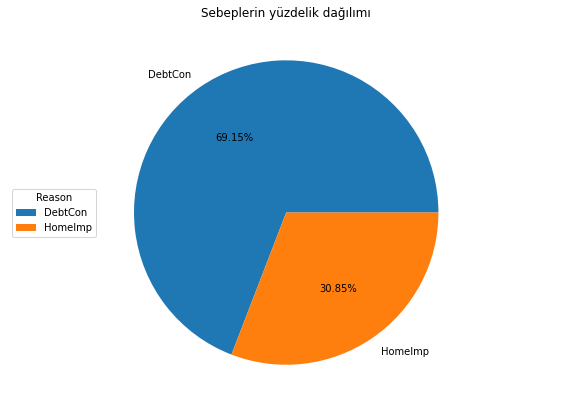

In [ ]:
sums = data.bad.groupby(data.reason).count()
fig= plt.figure(figsize=(10,7))
plt.axis('equal');
plt.title("Sebeplerin yüzdelik dağılımı")
plt.pie(sums, labels=sums.index, autopct="%1.2f%%");
plt.legend(title="Reason", loc="center left")
plt.show()

In [ ]:
import statsmodels.api as sm

# shapiro testini normalden gelip gelmedigi kontrol etmek icin yapiyoruz.

stat, p = stats.shapiro(data["mortdue"])
print("Statistics:%3.3f, p=%.3f " % (stat,p))

# H0: Normal dagilimdan gelmektedir
# H1: Normal dagilimdan gelmemektedir. 
# burada p values 0.785 oldugu icin 0.05'ten buyuk olmaktadir. Bu nedenle, yeterli kanit olmadigindan red edilir. 

alpha = 0.05 
if p>alpha:
  print("Orneklem Normal (Gaussian) Dagilimdan gelmektedir (Fail to Reject H0)")
else:
  print("Orneklem Normal (Gaussian) Dagilimdan gelmemektedir (reject H0")

Statistics:nan, p=1.000 
Orneklem Normal (Gaussian) Dagilimdan gelmektedir (Fail to Reject H0)


In [ ]:
stats.f_oneway(data["loan"].values, data["bad"].values, data["value"].values)

F_onewayResult(statistic=nan, pvalue=nan)

In [ ]:
stats.shapiro(data["loan"])

(0.8493258953094482, 0.0)

In [ ]:
stats.shapiro(data["mortdue"])

(nan, 1.0)

## **Normallik - Shapiro Testi**

In [157]:
dataa = data.dropna(subset=["mortdue"])
stat, p = stats.shapiro(dataa["mortdue"])

print("Statistics:%3.3f, p=%.3f " % (stat,p))

alpha = 0.05 
if p>alpha:
  print("Orneklem Normal (Gaussian) Dagilimdan gelmektedir (Fail to Reject H0)")
else:
  print("Orneklem Normal (Gaussian) Dagilimdan gelmemektedir (reject H0)")

Statistics:0.882, p=0.000 
Orneklem Normal (Gaussian) Dagilimdan gelmemektedir (reject H0)


In [158]:
dataa = data.dropna(subset=["value"])
stat, p = stats.shapiro(dataa["value"])

print("Statistics:%3.3f, p=%.3f " % (stat,p))

alpha = 0.05 
if p>alpha:
  print("Orneklem Normal (Gaussian) Dagilimdan gelmektedir (Fail to Reject H0)")
else:
  print("Orneklem Normal (Gaussian) Dagilimdan gelmemektedir (reject H0)")

Statistics:0.848, p=0.000 
Orneklem Normal (Gaussian) Dagilimdan gelmemektedir (reject H0)


In [159]:
stat, p = stats.shapiro(dataa["loan"])

print("Statistics:%3.3f, p=%.3f " % (stat,p))

alpha = 0.05 
if p>alpha:
  print("Orneklem Normal (Gaussian) Dagilimdan gelmektedir (Fail to Reject H0)")
else:
  print("Orneklem Normal (Gaussian) Dagilimdan gelmemektedir (reject H0)")

Statistics:0.847, p=0.000 
Orneklem Normal (Gaussian) Dagilimdan gelmemektedir (reject H0)


In [160]:
dataa = data.dropna(subset=["clno"])
stat, p = stats.shapiro(dataa["clno"])

print("Statistics:%3.3f, p=%.3f " % (stat,p))

alpha = 0.05 
if p>alpha:
  print("Orneklem Normal (Gaussian) Dagilimdan gelmektedir (Fail to Reject H0)")
else:
  print("Orneklem Normal (Gaussian) Dagilimdan gelmemektedir (reject H0)")

Statistics:0.966, p=0.000 
Orneklem Normal (Gaussian) Dagilimdan gelmemektedir (reject H0)


In [161]:
dataa = data.dropna(subset=["yoj"])
stat, p = stats.shapiro(dataa["yoj"])

print("Statistics:%3.3f, p=%.3f " % (stat,p))

alpha = 0.05 
if p>alpha:
  print("Orneklem Normal (Gaussian) Dagilimdan gelmektedir (Fail to Reject H0)")
else:
  print("Orneklem Normal (Gaussian) Dagilimdan gelmemektedir (reject H0)")

Statistics:0.904, p=0.000 
Orneklem Normal (Gaussian) Dagilimdan gelmemektedir (reject H0)


In [162]:
dataa = data.dropna(subset=["clage"])
stat, p = stats.shapiro(dataa["clage"])

print("Statistics:%3.3f, p=%.3f " % (stat,p))

alpha = 0.05 
if p>alpha:
  print("Orneklem Normal (Gaussian) Dagilimdan gelmektedir (Fail to Reject H0)")
else:
  print("Orneklem Normal (Gaussian) Dagilimdan gelmemektedir (reject H0)")

Statistics:0.920, p=0.000 
Orneklem Normal (Gaussian) Dagilimdan gelmemektedir (reject H0)


## **Bagimsiz T-Test (varianceleri esit degil)**

Burada bagimsiz t-test yapilip ortalamalara gore istatistiksel fark olup olmadigina bakilir. Kredi borcunu ödeme ile talep edilen kredi miktarı arasında anlamlılık bakılır. Sonuc olarak p< 0.05 olduğundan dolayı kredi skoru ve talep edilen kredi miktarı arasında bir anlamlılık yoktur.

In [125]:
bad = dataa[dataa['bad'] == 1]['loan']
good = dataa[dataa['bad'] == 0]['loan']

stats.ttest_ind(np.log(bad), np.log(good), equal_var=False)

Ttest_indResult(statistic=-2.556203361249307, pvalue=0.011138668332110628)

Aynı şekilde kredi borcu ödemesi ve ipotek arasında anlamlılık olup olmadığı kontrol edildiğinde p < 0.05 çıktığı görülmektedir. Dolayısıyla kişinin borcu ödeyip ödememesi ipotek ile ilgili değildir. 

In [126]:
dataa = data.dropna(subset=["mortdue"])
bad = dataa[dataa['bad'] == 1]['mortdue']
good = dataa[dataa['bad'] == 0]['mortdue']

stats.ttest_ind(np.log(bad), np.log(good), equal_var=False)

Ttest_indResult(statistic=-4.533396693401668, pvalue=6.582871178949366e-06)

Aynı şekilde borç/gelir oranı 

In [127]:
dataa = data.dropna(subset=["debtinc"])
bad = dataa[dataa['bad'] == 1]['debtinc']
good = dataa[dataa['bad'] == 0]['debtinc']

stats.ttest_ind(np.log(bad), np.log(good), equal_var=False)

Ttest_indResult(statistic=4.187161192036424, pvalue=3.913169139228284e-05)

## **Varyans Analizi (Levene)**

In [155]:
dataa = data.dropna(how="all")

stats.levene(data["loan"], data["mortdue"])

LeveneResult(statistic=nan, pvalue=nan)